<a href="https://colab.research.google.com/github/peaceemenike/Artificial-Intelligent/blob/main/reinforcement_learning/q_learning_gridworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Part 3: Q-learning on a simple 5x5 Gridworld
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

N = 5
actions = [(0,1), (1,0), (0,-1), (-1,0)]  # Right, Down, Left, Up
action_names = ["R","D","L","U"]

start = (0,0)
goal  = (N-1, N-1)

def step(state, action):
    r, c = state
    dr, dc = action
    nr, nc = max(0, min(N-1, r+dr)), max(0, min(N-1, c+dc))
    new_state = (nr, nc)
    reward = 10.0 if new_state == goal else -1.0
    done = (new_state == goal)
    return new_state, reward, done

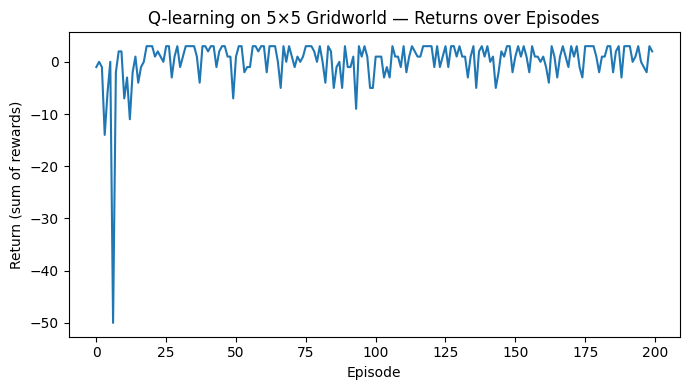

In [ ]:
# Q-table: rows, cols, actions
Q = np.zeros((N, N, len(actions)))

alpha  = 0.5
gamma  = 0.9
epsilon = 0.2

episodes = 200
returns = []

for ep in range(episodes):
    state = start
    total = 0.0
    for t in range(200):
        # ε-greedy
        if np.random.rand() < epsilon:
            a_idx = np.random.randint(len(actions))
        else:
            a_idx = np.argmax(Q[state[0], state[1]])

        nxt, r, done = step(state, actions[a_idx])

        # Q-learning update (off-policy)
        best_next = np.max(Q[nxt[0], nxt[1]])
        td_target = r + gamma * best_next
        Q[state[0], state[1], a_idx] += alpha * (td_target - Q[state[0], state[1], a_idx])

        state = nxt
        total += r
        if done:
            break
    returns.append(total)

# Plot returns per episode
plt.figure(figsize=(7,4))
plt.plot(returns)
plt.xlabel("Episode"); plt.ylabel("Return (sum of rewards)")
plt.title("Q-learning on 5×5 Gridworld — Returns over Episodes")
plt.tight_layout(); plt.show()

In [ ]:


# final max-Q and greedy policy
maxQ = np.max(Q, axis=2)
bestA = np.argmax(Q, axis=2)
arrow_map = {0:"→", 1:"↓", 2:"←", 3:"↑"}
policy = np.vectorize(lambda i: arrow_map[i])(bestA)

print("Final return (last episode):", returns[-1])

# Compact tables
print("\nMax-Q per state:")
print(pd.DataFrame(maxQ, index=[f"R{i}" for i in range(N)], columns=[f"C{j}" for j in range(N)]))

print("\nGreedy policy (arrows):")
print(pd.DataFrame(policy, index=[f"R{i}" for i in range(N)], columns=[f"C{j}" for j in range(N)]))

Final return (last episode): 2.0

Max-Q per state:
          C0        C1        C2        C3        C4
R0 -0.434062  0.628427 -1.385625 -0.842807  -1.32500
R1  0.628820  1.809800  3.055851  4.578483  -0.97500
R2  1.809800  3.122000  4.579999  6.199998   7.86499
R3  3.122000  4.580000  6.200000  8.000000  10.00000
R4  0.552187  3.121499  7.992981  9.999390   0.00000

Greedy policy (arrows):
   C0 C1 C2 C3 C4
R0  ↓  ↓  ←  ↓  ↓
R1  →  ↓  →  ↓  →
R2  ↓  ↓  ↓  ↓  ↓
R3  →  →  →  →  ↓
R4  ↑  ↑  →  →  →


## What the agent learned:

- Early episodes have low returns; with experience, returns trend upwards as the agent discovers shorter routes.

- The greedy policy arrows converge to a direct path pointing toward the goal.

- The Max-Q table is highest near the goal, reflecting larger expected return when close to success.